In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### 1. DATA PRICE

In [2]:
df = pd.read_csv("data/ingestion/price/us_stock_price_yahoo_finance_top10.csv")  
df = df[df['ticker']  == 'TSLA']
df

Unnamed: 0            timestamp        open        high         low  \
26979       26979  2010-06-29 13:30:00    1.266667    1.666667    1.169333   
26980       26980  2010-06-30 13:30:00    1.719333    2.028000    1.553333   
26981       26981  2010-07-01 13:30:00    1.666667    1.728000    1.351333   
26982       26982  2010-07-02 13:30:00    1.533333    1.540000    1.247333   
26983       26983  2010-07-06 13:30:00    1.333333    1.333333    1.055333   
...           ...                  ...         ...         ...         ...   
30790       30790  2025-08-22 13:30:00  321.660004  340.250000  319.690002   
30791       30791  2025-08-25 13:30:00  338.899994  349.529999  335.029999   
30792       30792  2025-08-26 13:30:00  344.929993  351.899994  343.720001   
30793       30793  2025-08-27 13:30:00  351.940002  355.390015  349.160004   
30794       30794  2025-08-28 13:30:00  350.910004  353.549988  340.260010   

            close    adjclose     volume  datetime  year  month  day ticker  \
26979    1.592667    1.592667  281494500  20100629  2010      6   29   TSLA   
26980    1.588667    1.588667  257806500  20100630  2010      6   30   TSLA   
26981    1.464000    1.464000  123282000  20100701  2010      7    1   TSLA   
26982    1.280000    1.280000   77097000  20100702  2010      7    2   TSLA   
26983    1.074000    1.074000  103003500  20100706  2010      7    6   TSLA   
...           ...         ...        ...       ...   ...    ...  ...    ...   
30790  340.010010  340.010010   94016300  20250822  2025      8   22   TSLA   
30791  346.600006  346.600006   86670000  20250825  2025      8   25   TSLA   
30792  351.670013  351.670013   76651600  20250826  2025      8   26   TSLA   
30793  349.600006  349.600006   65519000  20250827  2025      8   27   TSLA   
30794  345.980011  345.980011   67903200  20250828  2025      8   28   TSLA   

                         table_name  
26979  us_stock_price_yahoo_finance  
26980  us_stock_price_yahoo_finance  
26981  us_stock_price_yahoo_finance  
26982  us_stock_price_yahoo_finance  
26983  us_stock_price_yahoo_finance  
...                             ...  
30790  us_stock_price_yahoo_finance  
30791  us_stock_price_yahoo_finance  
30792  us_stock_price_yahoo_finance  
30793  us_stock_price_yahoo_finance  
30794  us_stock_price_yahoo_finance  

[3816 rows x 14 columns]

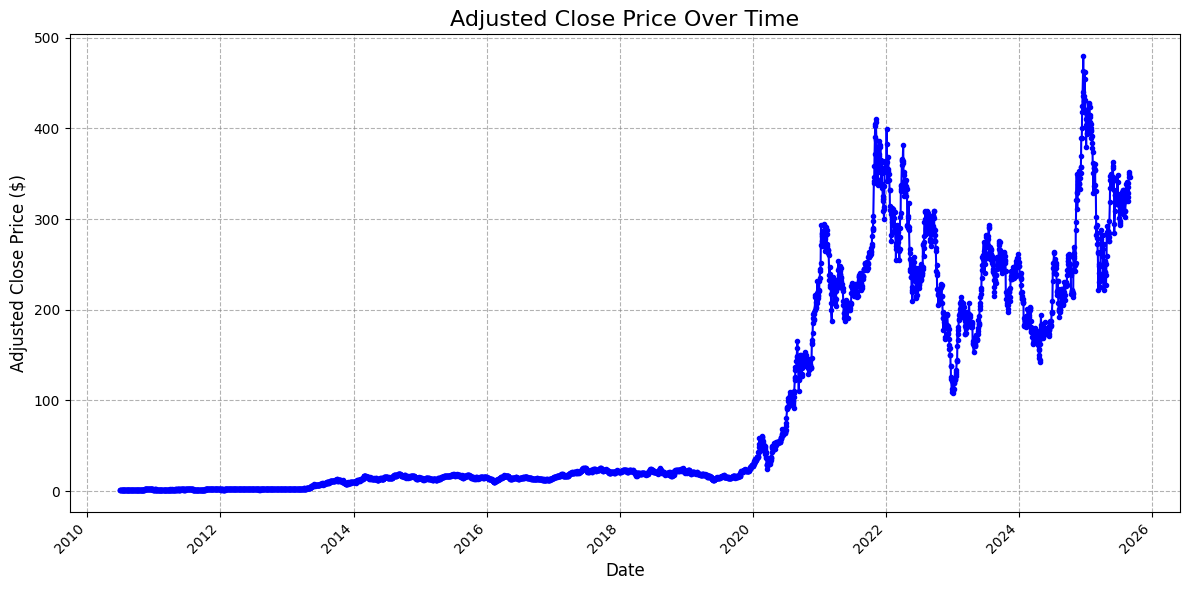

In [5]:
# --- Assume your df DataFrame is loaded here ---
# 1. Date formatting (Crucial Step - ensure 'timestamp' is datetime type)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# --- 2. Code to generate the CLEANER Line Chart ---

plt.figure(figsize=(12, 6)) # Increase size for better date spacing
ax = plt.gca() # Get current axes for more control

# Plot the data
ax.plot(df['timestamp'], df['adjclose'], 
        marker='o', 
        markersize=3, # Smaller markers for dense data
        linestyle='-', 
        color='blue', 
        linewidth=1.5)

# --- X-Axis Formatting Fix ---
# Use AutoDateLocator to intelligently place ticks (e.g., yearly, monthly)
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Rotate labels slightly for readability
plt.xticks(rotation=45, ha='right') 

# --- Grid & Background Fix ---
# Reset the background color to white (removes the solid gray block)
ax.set_facecolor('white')

# Add a clean, light grid (removes the dashed lines that look like shading)
ax.grid(True, linestyle='--', alpha=0.6, color='gray') 
# Ensure grid lines are drawn *behind* the plot data
ax.set_axisbelow(True)

# Add titles and labels
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price ($)', fontsize=12)

# Adjust layout to prevent labels from being cut off
plt.tight_layout() 

# Display the final plot
plt.show()

### 2. DATA NEWS

In [ ]:
# pip install seaborn wordcloud nltk

In [4]:
df = pd.read_csv("data/ingestion/news/nbc_articles_with_content_official.csv")  

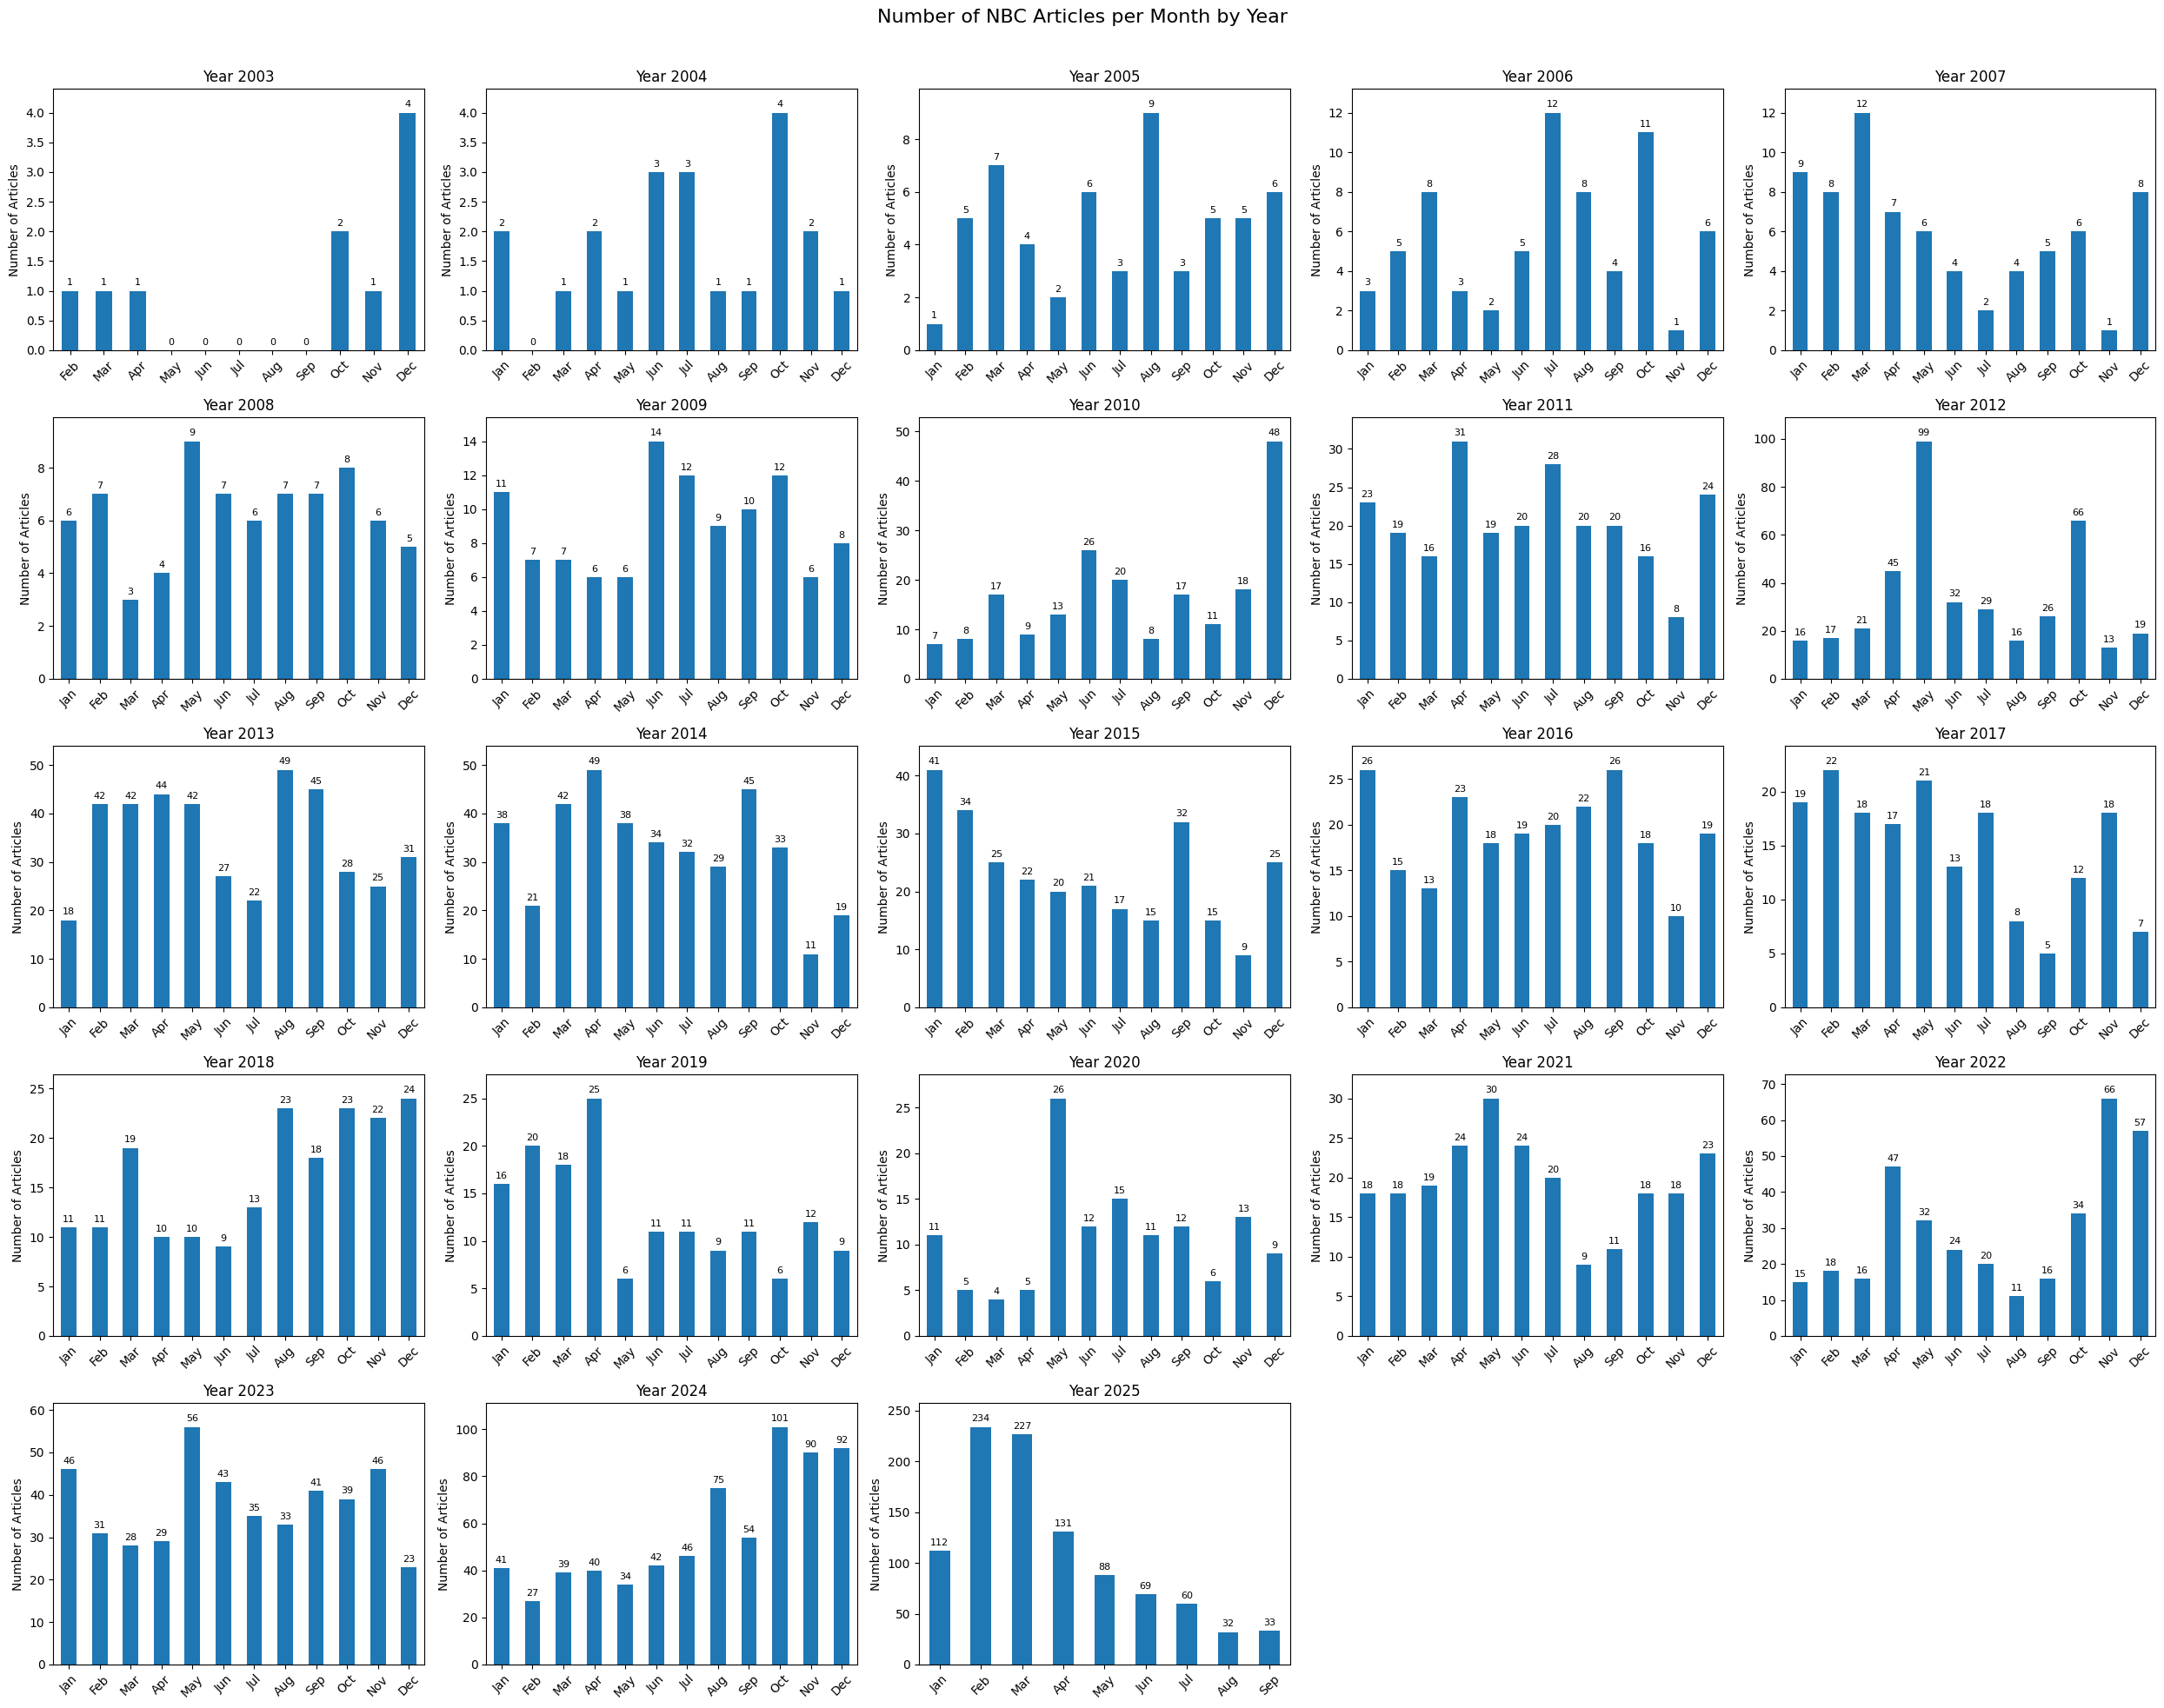

In [5]:
# 1. Convert 'date' column to datetime objects
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# 2. Aggregate monthly counts for ALL years
monthly_counts = (
    df.set_index("date")
      .resample("MS") # 'MS' means Month Start
      .size()
)

# 3. Get a list of unique years from the data
years = monthly_counts.index.year.unique()
n_years = len(years)

# 4. Calculate the required grid size for the subplots
n_cols = int(np.ceil(np.sqrt(n_years)))
n_rows = int(np.ceil(n_years / n_cols))

# 5. Create the figure and the grid of subplots
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(5 * n_cols, 4 * n_rows) # Adjust size as needed
)
axes = axes.flatten()

# 6. Loop through each year and plot on a different subplot
for i, year in enumerate(years):
    ax = axes[i]
    year_data = monthly_counts[monthly_counts.index.year == year]
    year_data.index = year_data.index.strftime('%b')
    
    # Plot the data
    bars = year_data.plot(kind="bar", ax=ax)
    
    # Add labels on top of each bar **
    for container in ax.containers:
        ax.bar_label(container, fontsize=8, padding=3)
    
    # Adjust the Y-axis to make space for the labels
    ax.margins(y=0.1)
    
    # Set the title and labels for each subplot
    ax.set_title(f"Year {year}")
    ax.set_xlabel(None)
    ax.set_ylabel("Number of Articles")
    ax.tick_params(axis='x', rotation=45)

# 7. Hide any unused subplots in the grid
for i in range(n_years, len(axes)):
    axes[i].axis('off')

fig.suptitle("Number of NBC Articles per Month by Year", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
pip install matplotlib

In [6]:
# --- Setup: Download necessary NLTK data (only need to run once) ---
nltk.download('stopwords')
nltk.download('punkt-tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punkt-tab: Package 'punkt-tab' not found in
[nltk_data]     index


False

Word Count Plot

Text(0, 0.5, 'Number of Articles')

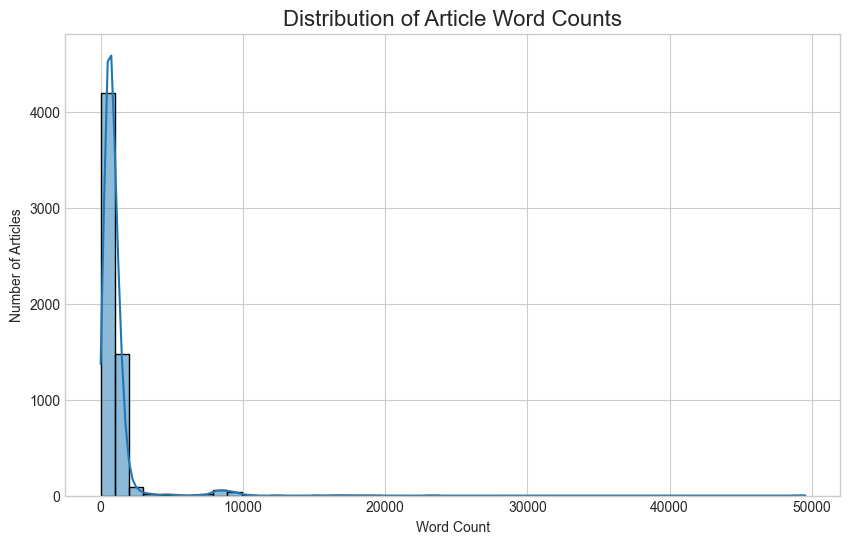

In [7]:
# --- 2. Calculate Word Count and Average Length ---
# Clean up the content: handle non-string data and remove punctuation for a more accurate word count
df['content'] = df['content'].fillna('').astype(str)
# Create a new column 'word_count'
df['word_count'] = df['content'].apply(lambda x: len(re.findall(r'\w+', x)))

# Calculate the average
average_length = df['word_count'].mean()

# --- 3. Analyze Word Count Distribution ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, bins=50)
plt.title('Distribution of Article Word Counts', fontsize=16)
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')

--- Analysis of Article Content ---
üìä Average Article Length: 991 words
-----------------------------------
üîù Top 20 Most Frequent Keywords:
- said: 35236
- space: 19900
- musk: 16579
- trump: 16129
- would: 14173
- one: 12768
- people: 11820
- also: 11279
- first: 9942
- nasa: 9839
- president: 9568
- like: 9256
- tesla: 9203
- spacex: 8893
- going: 8607
- think: 8231
- station: 7902
- time: 7623
- last: 7448
- launch: 7142
-----------------------------------


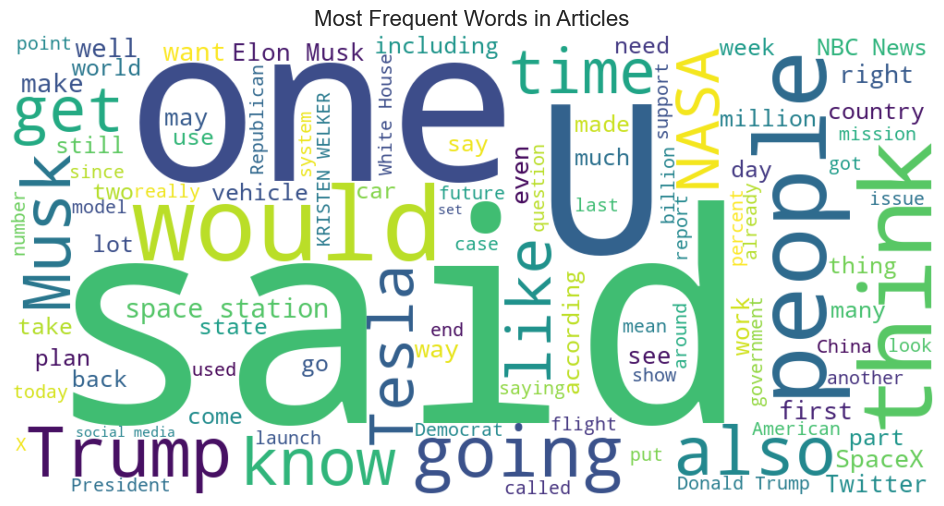

In [8]:
# --- 4. Find Frequent Keywords (Topics) ---
# Combine all article content into a single string
all_text = ' '.join(df['content'])

# Define English stopwords
stop_words = set(stopwords.words('english'))
# You can add custom words to the stopword list if needed
custom_stopwords = {'says', 'study', 'company', 'could', 'new', 'year', 'next'}
stop_words.update(custom_stopwords)


# Generate the word cloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stop_words,
    colormap='viridis',
    max_words=100
).generate(all_text)

# Tokenize and clean words to find the most frequent terms
tokens = nltk.word_tokenize(all_text.lower())
cleaned_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
freq_dist = nltk.FreqDist(cleaned_tokens)
top_20_words = freq_dist.most_common(20)


# --- 5. Display All Results ---

# Result 1: Average Length
print("--- Analysis of Article Content ---")
print(f"üìä Average Article Length: {average_length:.0f} words")
print("-" * 35)

# Result 2: Top 20 Keywords
print("üîù Top 20 Most Frequent Keywords:")
for word, frequency in top_20_words:
    print(f"- {word}: {frequency}")
print("-" * 35)


# Display the distribution plot
plt.show()

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Articles', fontsize=16)
plt.show()